In [1]:
!pip install matplotlib

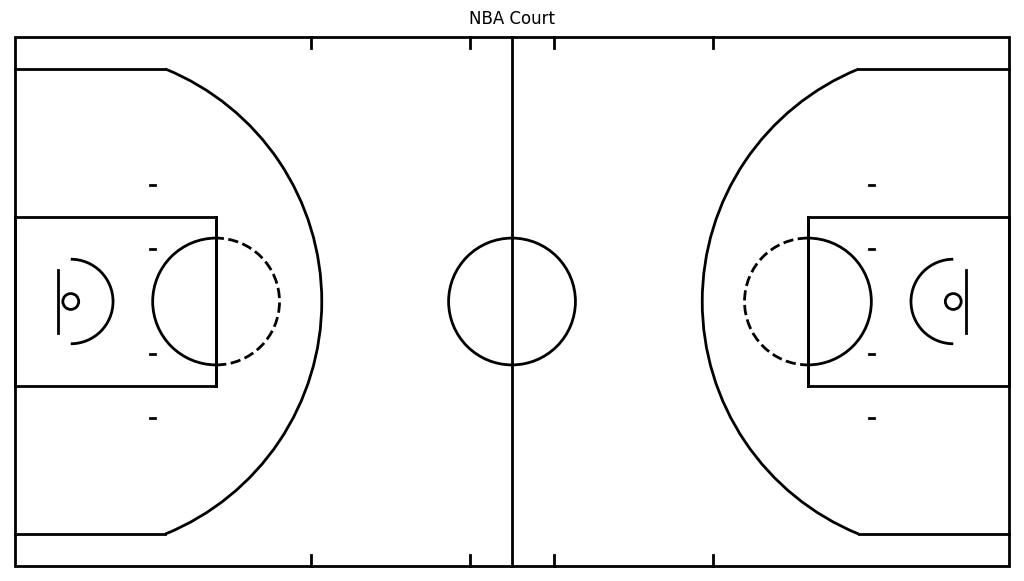

'nba_court_detailed.png'

In [2]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Arc

def draw_nba_court_detailed(scale=10, save_path="nba_court_detailed.png"):
    # --- NBA spec (feet) ---
    LENGTH = 94.0
    WIDTH  = 50.0
    CENTER_CIRCLE_R = 6.0
    FT_CIRCLE_R = 6.0
    KEY_WIDTH = 16.0
    BACKBOARD_TO_BASELINE = 4.0
    HOOP_CENTER_OFFSET_FROM_BACKBOARD = 1.25   # 15"
    HOOP_X_FROM_BASELINE = BACKBOARD_TO_BASELINE + HOOP_CENTER_OFFSET_FROM_BACKBOARD
    FT_LINE_FROM_BACKBOARD = 15.0
    FT_LINE_X = BACKBOARD_TO_BASELINE + FT_LINE_FROM_BACKBOARD
    RESTRICTED_R = 4.0
    THREE_R = 23.75
    THREE_MIN_FROM_SIDELINE = 3.0

    # Lower Defensive Box (Rule 1(g))
    LDB_HASH_FROM_BASELINE = 13.0   # x
    LDB_HASH_FROM_LANE = 3.0        # y offset from lane line
    LDB_HASH_LEN = 0.5              # 6"

    # Timeout hashes (Rule 1(5))
    TIMEOUT_HASH_FROM_BASELINE = 28.0
    TIMEOUT_HASH_LEN = 1.0

    # Substitution box (Rule 1(8))
    SUB_BOX_OFFSET_FROM_MID = 4.0
    SUB_BOX_HASH_LEN = 1.0

    # --- Scaled values ---
    L = LENGTH * scale
    W = WIDTH * scale
    cx = L / 2
    cy = W / 2

    hoop_left_x  = HOOP_X_FROM_BASELINE * scale
    hoop_right_x = (LENGTH - HOOP_X_FROM_BASELINE) * scale
    hoop_y = cy
    rim_r = (18.0/12.0) / 2.0 * scale  # 18" diameter

    ft_left_x  = FT_LINE_X * scale
    ft_right_x = (LENGTH - FT_LINE_X) * scale
    half_key_w = (KEY_WIDTH / 2) * scale

    three_r = THREE_R * scale
    restr_r = RESTRICTED_R * scale
    center_r = CENTER_CIRCLE_R * scale
    ft_r = FT_CIRCLE_R * scale

    # y of corner 3 straight segments
    y_low  = THREE_MIN_FROM_SIDELINE * scale
    y_high = (WIDTH - THREE_MIN_FROM_SIDELINE) * scale

    # geometry for 3PT arc meeting straight lines
    d_y = (WIDTH/2 - THREE_MIN_FROM_SIDELINE)
    theta0 = math.degrees(math.asin(d_y / THREE_R))
    x_off  = math.sqrt(THREE_R**2 - d_y**2) * scale
    left_3pt_x  = hoop_left_x  + x_off
    right_3pt_x = hoop_right_x - x_off

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_aspect("equal")

    # 1) Outer boundary
    ax.add_patch(Rectangle((0, 0), L, W, fill=False, lw=2))

    # 2) Center line & circle
    ax.plot([L/2, L/2], [0, W], color="black", lw=2)
    ax.add_patch(Circle((cx, cy), center_r, fill=False, lw=2))

    # 3) Keys & free-throw lines
    ax.add_patch(Rectangle((0, cy - half_key_w), ft_left_x, KEY_WIDTH*scale, fill=False, lw=2))
    ax.add_patch(Rectangle((ft_right_x, cy - half_key_w), L - ft_right_x, KEY_WIDTH*scale, fill=False, lw=2))
    ax.plot([ft_left_x,  ft_left_x],  [cy - half_key_w, cy + half_key_w], color="black", lw=2)
    ax.plot([ft_right_x, ft_right_x], [cy - half_key_w, cy + half_key_w], color="black", lw=2)

    # 4) Free-throw circles (top solid, bottom dashed)
    ax.add_patch(Arc((ft_left_x, cy),  2*ft_r, 2*ft_r, theta1=90,  theta2=270, lw=2))
    ax.add_patch(Arc((ft_left_x, cy),  2*ft_r, 2*ft_r, theta1=-90, theta2=90,  lw=2, ls="--"))
    ax.add_patch(Arc((ft_right_x, cy), 2*ft_r, 2*ft_r, theta1=-90, theta2=90,  lw=2))
    ax.add_patch(Arc((ft_right_x, cy), 2*ft_r, 2*ft_r, theta1=90,  theta2=270, lw=2, ls="--"))

    # 5) Restricted areas
    ax.add_patch(Arc((hoop_left_x,  hoop_y), 2*restr_r, 2*restr_r, theta1=-90, theta2=90,  lw=2))
    ax.add_patch(Arc((hoop_right_x, hoop_y), 2*restr_r, 2*restr_r, theta1=90,  theta2=270, lw=2))

    # 6) Three-point lines (straight + arc)
    ax.plot([0, left_3pt_x],  [y_low,  y_low],  color="black", lw=2)
    ax.plot([0, left_3pt_x],  [y_high, y_high], color="black", lw=2)
    ax.add_patch(Arc((hoop_left_x, hoop_y),  2*three_r, 2*three_r, theta1=-theta0,        theta2=theta0,        lw=2))
    ax.plot([L, right_3pt_x], [y_low,  y_low],  color="black", lw=2)
    ax.plot([L, right_3pt_x], [y_high, y_high], color="black", lw=2)
    ax.add_patch(Arc((hoop_right_x, hoop_y), 2*three_r, 2*three_r, theta1=180 - theta0, theta2=180 + theta0, lw=2))

    # 7) Backboards & rims
    bb_half_span = (6.0/2.0) * scale
    bb_x_left  = BACKBOARD_TO_BASELINE * scale
    bb_x_right = (LENGTH - BACKBOARD_TO_BASELINE) * scale
    ax.plot([bb_x_left,  bb_x_left],  [hoop_y - bb_half_span, hoop_y + bb_half_span], color="black", lw=2)
    ax.plot([bb_x_right, bb_x_right], [hoop_y - bb_half_span, hoop_y + bb_half_span], color="black", lw=2)
    ax.add_patch(Circle((hoop_left_x,  hoop_y), rim_r, fill=False, lw=2))
    ax.add_patch(Circle((hoop_right_x, hoop_y), rim_r, fill=False, lw=2))

    # 8) Lower Defensive Box hashes（13' from baseline, 3' from lane lines, 6" long）
    x_l_hash = LDB_HASH_FROM_BASELINE * scale
    x_r_hash = (LENGTH - LDB_HASH_FROM_BASELINE) * scale
    lane_y_low  = cy - half_key_w
    lane_y_high = cy + half_key_w
    y_positions = [
        lane_y_low  - LDB_HASH_FROM_LANE*scale,
        lane_y_low  + LDB_HASH_FROM_LANE*scale,
        lane_y_high - LDB_HASH_FROM_LANE*scale,
        lane_y_high + LDB_HASH_FROM_LANE*scale,
    ]
    half_len = (LDB_HASH_LEN/2.0) * scale
    for y0 in y_positions:
        ax.plot([x_l_hash - half_len, x_l_hash + half_len], [y0, y0], color="black", lw=2)
        ax.plot([x_r_hash - half_len, x_r_hash + half_len], [y0, y0], color="black", lw=2)

    # 9) Timeout hashes（28' from baseline）
    xt_left  = TIMEOUT_HASH_FROM_BASELINE * scale
    xt_right = (LENGTH - TIMEOUT_HASH_FROM_BASELINE) * scale
    tlen = TIMEOUT_HASH_LEN * scale
    for x in [xt_left, xt_right]:
        ax.plot([x, x], [0, tlen],     color="black", lw=2)
        ax.plot([x, x], [W - tlen, W], color="black", lw=2)

    # 10) Substitution box（midcourt ±4'）
    x_sub_l  = (LENGTH/2 - SUB_BOX_OFFSET_FROM_MID) * scale
    x_sub_r  = (LENGTH/2 + SUB_BOX_OFFSET_FROM_MID) * scale
    slen = SUB_BOX_HASH_LEN * scale
    for x in [x_sub_l, x_sub_r]:
        ax.plot([x, x], [0, slen],     color="black", lw=2)
        ax.plot([x, x], [W - slen, W], color="black", lw=2)

    ax.axis("off")
    ax.set_xlim(-5, L + 5)
    ax.set_ylim(-5, W + 5)
    plt.title("NBA Court")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
    return save_path

# example
draw_nba_court_detailed(scale=10)